# Generative AI - SEBx & Combient Hackathon December 2023

Some introduction text here .. summarizing the main purpopse of the BootCamp and the exercises in particular
<br />
<br />

***

**Note:**
This notebook contains code written in [Python](https://www.python.org/), which is a commonly used programmming language. No advanced coding expertise is required for completing the exercises and clear instructions are provided for when and where some modifications are required from the user. The notebook itself is a [Jupyter notebook](https://jupyter.org/), which provides a graphical interface for writing and executing Python code as well as displaying the output. The cell blocks in this notebook are either text formatted via the [Markdown langugage](https://en.wikipedia.org/wiki/Markdown) or executable code snippets written in Python.

The box below provides instructions for executing the code within these cell blocks and the result of executing code will be displayed beneath the relevant code cell block.


In order to run this notebook properly you will need

* **Gmail account** - Follow the provided instructions to download the notebook to your GDrive, so that you can edit and save it freely.
* **Google GDrive access** - enable the app `Google Colaboratory`. The process is highlighted in the accompanying reading material, but you can also ask ChatGPT a question like this by posing the following query: <span style="color:blue;">How do I enable google colab for the first time?</span>

> **`Run and execute each code cell block in the notebook in a consecutive manner. This is important since some code cell blocks relies on having properly executed some previous code cell block.`**
>
>
> Notebook code blocks can be executed via either:
> * **shift + enter**: executes current code block and moves to the cell below
> * **control + enter**: executes current code block

## Environment setup

Here we set up the environment and make sure we can access data via Google Drive. Run the below code blocks to install necessary packages.

Run the code below to clone the GenAI_BootCamp2023 directory which contains files which we will be using during this course. The code clones a directory called GenAI_BootCamp2023 from our Github repository.

> **`During execution of this cell block you will be prompted to provide your GDrive access to download the course content. Use your Google account credentials to allow this action.`**

In [1]:
use_drive = False

if use_drive:
  import os
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)

  # This moves into the drive where the course content folder will be downloaded
  %cd /content/drive/MyDrive


  repo_path = 'bootcamp_dec7'
  #repo_url = 'https://github.com/banque-nouveau/bootcamp_dec7.git'
  repo_url = 'git@github.com:banque-nouveau/bootcamp_dec7.git'


  #os.environ['GIT_SSH_COMMAND'] = 'ssh -i /content/bootcamp7dec.key -o IdentitiesOnly=yes'

  # Check if the repo directory exists
  if os.path.isdir(repo_path):
    # If it exists, then pull any changes from the remote repository
    %cd {repo_path}
    !git pull
    %cd ..
  else:
    # If the directory does not exist, clone the repository
    !GIT_SSH_COMMAND='ssh -i /content/bootcamp7dec.rsa -o IdentitiesOnly=yes' git clone git@github.com:banque-nouveau/bootcamp_dec7.git
    #!git clone {repo_url}

You can now view the files by clicking on the directory folder.

## Packages & Imports

Installing and importing necessary packages/modules. Note that these are only installed in a virtual environment when using the Colab Notebook.

Run the below code block to install some of the Python libraries which are required for running the Notebook.

Note that this may take up to ~15 seconds to complete.

In [2]:
!pip install -q cohere \
    -q tiktoken \
    -q langchain \
    -q sentence_transformers \
    -q openai \
    -q faiss-cpu \
    -q colorama \
    -q pypdf \
    -q PyMuPDF \
    -q requests \
    -q beautifulsoup4 \
    -q umap-learn \
    -q mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.6/277.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 23.2 MB/s e

Run the below code block to import the necessary library modules used in the notebook.

Note that this may take up to ~20 seconds to complete.

In [3]:
# Some system and base modules
import os
import sys
from timeit import default_timer as timer
from typing import List, Optional, Type
import getpass

# NLP modules
import openai
from openai import OpenAI
import langchain
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter
from langchain.document_loaders import PyPDFLoader, JSONLoader
import fitz
from langchain.vectorstores import FAISS
from langchain.chat_models import ChatOpenAI
import requests
from bs4 import BeautifulSoup

# Other modules
import numpy as np
import pandas as pd
import umap
from colorama import Fore, Back, Style


# modules for plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mycolorpy import colorlist as mcp
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [4]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(16,10)})

In [5]:
print(f"OpenAI version: {openai.__version__}")
print(f"Langchain version: {langchain.__version__}")

OpenAI version: 1.3.7
Langchain version: 0.0.344


## Import helper functions used in the Notebook

Run the code block below to import customized helper functions used in the notebook. These functions have been written to, for example, process PDF files and reduce clutter in the notebook by using explicit code. All of the imported functions are located in the file `helper_functions.py` where you may explore their definitions.

In [6]:
get_helper_funcs = False

if get_helper_funcs:
  import sys
  sys.path.append('/content/drive/MyDrive/bootcamp_dec7/')

  from helper_functions import *

## Setting the access key for OpenAI API

> **NB: Don't share the OpenAI access key in public spaces.**

> **The OpenAI API key can be set manually in the notebook by running the code cell block below.**
>
> **`A query box will appear the first time you run the below code cell block. Paste the OpenAI API key which you have been provided into the query box and press Enter/Return (access key is on the form sk-...)`**

In [8]:
# Here we can set the OpenAI API access key manually in case it fails to load from the environment.
if not os.environ.get("OPENAI_API_KEY"):
  api_key = getpass.getpass("Enter OpenAI API Key here")
  os.environ["OPENAI_API_KEY"] = api_key
else:
  print(f"OPENAI_API_KEY fetched from environment!")


# sk-...

OPENAI_API_KEY fetched from environment!


In [9]:
# You can optionally manually insert the OpenAI API key below between the quotation marks.
# Then uncomment the following two lines by removing the preceeding # and run the cell

#os.environ["OPENAI_API_KEY"] = "sk-..."
#print(f"The Open AI access key is given by: \n\n {os.environ['OPENAI_API_KEY']}")

In [10]:
# The following helps to format print output to match the size of the broser window
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Hands-On 1: Interfacing with OpenAI API, Prompt Engineering & Internet access for Extended LLM Functionality

This section provides a hands-on introduction to API interactions with the OpenAI GPT models and Prompt Engineering for end users with a basic understanding of the Python programming language. No advanced coding or technical background knowledge of generative AI or LLM is required for completing the exercises in the notebook.

<br>


<b>Example themes for exercises </b>:

* We will see how to interact with the OpenAI models via API. This includes simple one-turn interactions and concatenating conversations for follow up queries.

* Basic Prompt Engineering techniques which introduces the lkey concepts for enabling productive interactions with LLMs.

* Search the internet using the DuckDuckGo search engine. The DuckDuckGo search engine is available via open sourced API and allows for fetching updated information based on keyword search. This also introduces the concept of Retrieval Augmented generation (RAG) in a simple manner.

## Interacting with OpenAI models via API

**Why should you use API?**

Using the OpenAI API (Application Program Interface) to access LLM models gives us several advantages over the browser version, especially when we want to build custom made applications. One of the big perks of using the API is automation. Python, as a common programming langauge, is great at taking care of repeating or tricky tasks, which is helpful when we have a lot of such tasks to handle.

With the help of python we can also get the OpenAI models to work well with other tools and software we have. Plus, it lets us adjust things to work the way we want, making our interaction with the OpenAI models more tailored.

Additionally, using the API helps us keep track of any changes made along the way, which is great for collaborative team work. This also ensures that every time we run a task, it gives us consistent results, making it easier to check if something goes wrong and fix it. This reliability helps make our solutions stronger and more dependable.

We will be making use of a wraper from the `langchain` code library to call on the OpenAI models. This provides a simple and relatively user-friendly way to interact with the model, making it a great choice for beginners or for those looking to get things done quickly. This method provides us access to a `temperature` parameter, which determines the randomness or stochastic nature of the output the model will give us. A temperature of 1 makes the model more random, while a temperature close to 0 makes the model more deterministic with the same output for repeated queries. Empirical studies have shown that most people prefer the output to be somewhat creative in nature with a temperature value of around 0.7, which is the default value set for the OpenAI models. You can try changing this value and experience how the output changes for the same query.

In the code snippet below we call on the API to create a chat_model instance. Model is specified via the `model` parameter on the second row. A complete list of available models to choose from can be found [here](https://platform.openai.com/docs/models/overview). We will start by using one of the GPT-3.5 turbo models.

* **gpt-3.5-turbo** uses the latest available model version of GPT-3.5. Allows for up to **16,385 tokens** as input and output
    * **gpt-3.5-turbo-0613** is a legacy version of GPT-3.5, currently the same as above. Will be replaced Dec 11 2023 and be depricated on June 13 2024. Has a **4,096 token** limit
    * **gpt-3.5-turbo-1106** is the latest version of GPT-3.5, with enhanced capabilities and a **16,385 token** limit. Will become default model after Dec 11 2023

</b>

* **gpt-4** uses the latest available model version of GPT-4. Allows using up to **128,000 tokens** as input and output
    * **gpt-4-0613** is the latest stable version of GPT-4, same as above but with a **8,192 token** limit
    * **gpt-4-1106-preview** is the latest preview version of GPT-4, with a **128,000 token** limit, but not suited for production traffic

In [11]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)

> **NB 1: The GPT-3.5 model usually only takes seconds to respond to a query. If it takes more than half a minute, stop the execution and rerun the cell block.**

> **NB 2: This is one option for implementing the LLM call, which is nice due to its simple and intuitive format. At the bottom of this section we explore using the OpenAI API directly as an alternative option, which provides even greater control of the input/output.**

The `chat_model` instance accepts a list of `messages` as input. We specify messages according to a schema used by various functions in the `langchain` library. This will facilitate some of the more advanced functionalities we will make use of later. Messages in a chat conversation are generally provided as a `list` (inside square brackets) of conversation turns.

In [12]:
from langchain.schema import (
    # Overall system behaviour of the chat bot
    SystemMessage,
    # User message, query to chat bot
    HumanMessage,
    # The response from the chat bot, for conversational turns
    AIMessage
)


# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = "You are a helpful assistant."

# The user prompt is what would be written in the chat interface, your query
user_prompt = "What do you know about OpenAI's mission statement?"


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [13]:
# We can check what the messages looks like by printing it out
messages

[SystemMessage(content='You are a helpful assistant.'),
 HumanMessage(content="What do you know about OpenAI's mission statement?")]

As we see, the `messages` variable is a list containing our `SystemMessage` and `HumanMessage`.


Once we have a list of messages in the above format it is easy to call the OpenAI model and get a response

> **`Calling on the OpenAI models relies on connecting to the OpenAI server. This can occasionally be`**

In [14]:
# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

OpenAI's mission is to ensure that artificial general intelligence (AGI) benefits all of humanity. They aim to conduct and promote research that aligns with this goal, and to develop and share the knowledge and tools needed for creating AGI in a safe and beneficial way. Additionally, OpenAI seeks to foster a community of AI researchers and developers who can collaborate and contribute to the advancement of AGI technology.


The full response is actually formatted as a `AIMessage`, as we can see by printing out the full response without using the print function. Observe that if we do not use the formatting of the `print` function you will see linebreak characters such as `\n` appearing in the message.

In [15]:
response

AIMessage(content="OpenAI's mission is to ensure that artificial general intelligence (AGI) benefits all of humanity. They aim to conduct and promote research that aligns with this goal, and to develop and share the knowledge and tools needed for creating AGI in a safe and beneficial way. Additionally, OpenAI seeks to foster a community of AI researchers and developers who can collaborate and contribute to the advancement of AGI technology.")

### Giving ChatGPT a short-term memory

We can incorporate the `AIMessage` response in a new series of messages and ask a follow up question if you wish. This provides the illusion of the chat model having a memory and being able to continue a conversation for a few turns, as you have seen while working in the browser environment.

In [16]:
# Let's ask a follow-up question which refers to the previous conversation without explicitly mentioning e.g., Patricia Industries
follow_up_question = "Can you say something more about the mission statement?"

# We can now add the response we got from the first query together with our follow-up question
# Note that if we did not include the first message, the reference to that would be missing in this follow-up
# In python, you can add lists together to form a new list which makes it easy to add new conversation turns into the messages variable
# Not that we add both the chat bot response and our follow up question
messages = messages + [response, HumanMessage(content=follow_up_question)]
messages

[SystemMessage(content='You are a helpful assistant.'),
 HumanMessage(content="What do you know about OpenAI's mission statement?"),
 AIMessage(content="OpenAI's mission is to ensure that artificial general intelligence (AGI) benefits all of humanity. They aim to conduct and promote research that aligns with this goal, and to develop and share the knowledge and tools needed for creating AGI in a safe and beneficial way. Additionally, OpenAI seeks to foster a community of AI researchers and developers who can collaborate and contribute to the advancement of AGI technology."),
 HumanMessage(content='Can you say something more about the mission statement?')]

In [17]:
# Here we collect the ouput from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

OpenAI's mission statement reflects their commitment to advancing artificial general intelligence in a way that prioritizes the well-being of humanity. They emphasize the importance of conducting research and developing tools that contribute to the safe and beneficial creation of AGI. Furthermore, OpenAI aims to foster a collaborative and inclusive community of AI researchers and developers who share a common vision for the responsible and ethical advancement of AI technology. Overall, their mission is centered around ensuring that AGI is developed and utilized in a manner that serves the best interests of all people.


By continuing in this fashion we can record a conversation history which we send to the chat model as long as the total text content does not exceed the models content limit.

### OPTIONAL: Using the OpenAI API directly instead of the `langchain` wrapper

The below code snippet calls the OpenAI API directly, which allows us to access **all** of the available input and output options. While this approach offers a higher degree of control, it may not be as easy to use or straightforward to interpret as the functions from langchain. If you are interested you can try it out on your own and test various parameters. For example, the `top_p` parameter is another way to control the randomness of the model output. The recomendation from OpenAI is to use either `temperature` or `top_p` for this purpose and not both.

In [18]:
# Needs to be set for the OpenAI API to be callable
openai.api_key = os.getenv("OPENAI_API_KEY")


# Model and parameters (almost all that are available, logit_bias not included). Parameters model and messages are required
model = "gpt-3.5-turbo-1106"
max_tokens = 1024           # Max nr of tokens to generate in the chat completion, limited by model choice
temperature = 0.7           # Value in (0, 2). Sampling temperature for stochastic nature in response
top_p = 1                   # Vale in (0, 1). Nucleus sampling, optional to temperature, considers tokens comprising top_p probability mass
frequency_penalty = 0       # Value in (-2, 2). Positive value penalizes new tokens based on frequency in text so far, to decrease likelihood of repeating sentences
presence_penalty = 0        # Value in (-2, 2). Positive value penalizes new tokens if appeared in text so far, to increase likelihood of switching to new topics
n=1                         # How many completion options to generate for each message
stream = False              # Boolean value which can allow for streaming response

# More advanced options which allow to include function calling capability for the model itself. We will not use this functionality in the exercises below
function_call = "none"      # 'auto' if call function or generate message, supply {"name": my_func}
functions = [{"name": "Name", "description": "semantic description of what the function(s) do", "parameters": {"type": "object", "properties": {}}}]


# Messages are provided as a list, similarly to the langchain method, but formatted differently
# Other possible values for the key 'role' are 'assistant' and 'function'
system_prompt = "You are a helpful assistant."
user_prompt = "What do you know about OpenAI's mission statement?"

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": user_prompt},
    ]


# API call, collected in the variable response
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
response = client.chat.completions.create(
            model=model,
            messages=messages,
            temperature=temperature,
            max_tokens=max_tokens,
            top_p=top_p,
            frequency_penalty=frequency_penalty,
            presence_penalty=presence_penalty,
            n=n,
            stream=stream,
            function_call=function_call,
            functions=functions
        )


# Printing the response requires a slighty less intuitive format (see below for full unformatted output)
print(response.choices[0].message.content)

OpenAI's mission statement is to ensure that artificial general intelligence (AGI) benefits all of humanity. They aim to conduct research and build safe and beneficial AGI, and to ensure its implementation is aligned with human values. OpenAI also emphasizes the importance of transparency and collaboration in their efforts to develop advanced AI technologies.


We can take a look at the complete response without simplifying or changing the output in any way. When you print the information from the code below, you will see that the response includes details about token usage and other aspects. These details are important as they help you estimate and collect the cost of running queries.

In [19]:
# Printing the response variable without formatting via the print() function displays the full output from the model
response

ChatCompletion(id='chatcmpl-8RD6ZCZI3mOFlP1ZAlg4cArDwPemt', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content="OpenAI's mission statement is to ensure that artificial general intelligence (AGI) benefits all of humanity. They aim to conduct research and build safe and beneficial AGI, and to ensure its implementation is aligned with human values. OpenAI also emphasizes the importance of transparency and collaboration in their efforts to develop advanced AI technologies.", role='assistant', function_call=None, tool_calls=None))], created=1701495923, model='gpt-3.5-turbo-1106', object='chat.completion', system_fingerprint='fp_eeff13170a', usage=CompletionUsage(completion_tokens=64, prompt_tokens=59, total_tokens=123))

## Prompt Engineering techniques

Prompt Engineering (PE) is the primary vehicle for guiding generative AI models towards stable applications. It is particularly applicable to Large Language Models (LLMs) and involves formulating prompts and prompting schemas in order to retrieve appropriate responses to queries. It is essential for meaningful interactions with LLMs.

<br>

Here we will explore some basics of Prompt Engineering. We showcase examples of techniques for efficiently extracting information from Large Language Models (LLMs). These techniques are widely applicable across different models, but work the best for the very large models trained on a large corpus of data.

<br>

In this hands-on session we aim to cover

* **Why is prompting technique important?**
  * Prompting helps in formulating the input in a way that the model can understand and respond to effectively. A well-crafted prompt can significantly improve the quality and relevance of the model's output.
  * Through prompting, you can guide the model's responses in a particular direction or within certain boundaries. This is crucial for obtaining accurate, relevant, or safe responses.
  * Forms the basis behind developing advanced functionalities on top of generative AI base models.

<br>

* **What can we achieve?**
  * Quickly read and summarize/extract relevant information from text source.
  * Transform text into a format which is directly useful for you. This includes e.g. language translation or formatting the output as excel table, JSON dictionary, MarkDown or html.
  * Get feedback and suggestions for improvement and introspection. This may include both natural language text and code.
  * Infer sentiment, topic and logic structure in text.
  * Generate/revise drafts for planning, policies, mails, slides and more.
  * Brainstorming partner and ideation, an extra brain in the room.

<br>

* **Important techniques**
  * **Best practices** - Write clearly and use semantic clues rather than keyword searching. Clearly state your goals and wishes, have an intent with your promt. In some sense it is like moving back to how you perhaps intuitively wanted to interact with e.g. Google when searching internet. Or how you would ask an all-knowing oracle. Don't be afraid to interact, provide feedback and follow up when the output is not what you desired.
  * **Role Task Format (RTF)** - Give the LLM a *role*, to set it in the right *mood*, define a clear *task* to be achieved and provide a couple of examples of how you want to *format* the output.
  * **In Context Learning (ICL)** - Provide examples and any additional information to consider as context for your prompt. This allows for a *shallow* learning, where the LLM can learn from your prompt without updating any weights of the model. It is easier to make the bigger models accept new information in the prompt and generalize from that. The smaller models are more locked into the worldview built from training.
  * **Chain of Thought (CoT)** - Ask the model to think through problems logically and in a step-by-step manner. This helps the model to linearize the problem into a sequence of logical considerations and often produce more accurate output.


These techniques usually take us very far and form a basis for more advanced applications built on chaining prompts, such as e.g. [Tree of thought](https://arxiv.org/abs/2305.10601).

### **Summarizing**

Summarizing or extracting information from text sources are areas where LLMs shine particularly bright. This can be helpful for condensing lengthy news articles, generating concise summaries of meetings or reports, summarizing books or chapters for quick review or understanding and summarizing customer feedback or reviews in order to understand common sentiments or issues.

In [20]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = "You are a helpful assistant."


user_prompt = f"""
Summarize the following conversation between a service representative and a customer in a few sentences.
Use only the information from the conversation.

Service Rep: How may I assist you today?
Customer: I need to change the shipping address for an order.
Service Rep: Ok, I can help you with that if the order has not been fulfilled from our warehouse yet.
But if it has already shipped, then you will need to contact the shipping provider. Do you have the order ID?
Customer: Yes, it's 88986367.
Service Rep: One minute please while I pull up your order information.
Customer: No problem
Service Rep: Ok, it looks like your order was shipped from our warehouse 2 days ago.
It is now in the hands of  the shipping provider, so you will need to contact them to update your delivery details.
You can track your order with the shipping provider here: https://www.shippingprovider.com
Customer: Sigh, ok.
Service Rep: Is there anything else I can help you with today?
Customer: No, thanks.
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [21]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

The customer contacted the service representative to change the shipping address for an order. The service rep explained that if the order has not been fulfilled, they can assist, but if it has already shipped, the customer will need to contact the shipping provider. After providing the order ID, the service rep informed the customer that the order had already been shipped and provided a link to track the order with the shipping provider. The customer expressed disappointment and declined further assistance.


**Try it out:**

Try changing the prompt for the above conversation and compare the answers:


**Summarize with a word limit:**

In [22]:
follow_up_prompt = f"""
Summarize the conversation in at most 30 words.
Use only the information from the conversation.
"""


# These are collected into a messages list of
new_messages = messages + [response, HumanMessage(content=follow_up_prompt)]


# Here we collect the output from the chat model in the variable response
new_response = chat_model.invoke(new_messages)

# We can print out the response by calling on its content using a .content
print(new_response.content)

Customer requested a shipping address change. Service rep explained process, found order shipped, directed customer to shipping provider. Customer declined further assistance.


**Summarize with a focus on sentiment:**

In [23]:
follow_up_prompt = f"""
Summarize the conversation in at most 30 words,
focusing on any aspects which are relevant to customer's sentiment.
Use only the information from the conversation.
"""


# These are collected into a messages list of
new_messages = messages + [response, HumanMessage(content=follow_up_prompt)]


# Here we collect the output from the chat model in the variable response
new_response = chat_model.invoke(new_messages)

# We can print out the response by calling on its content using a .content
print(new_response.content)

The customer wanted to change the shipping address for an order, but the service rep informed them that the order had already been shipped, leading to the customer feeling disappointed.


### **Impersonating or defining a Role**
Defining a role is often useful when you are looking for expert answers in a specific field or just want a personalized interaction. It can be used for company chat bots or a friendly assistant. Examples of roles to consider are: Expert, Critic, project Manager, Inventor, Journalist, entrepreneur, CFO, etc.

In [24]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are a helpful assistant defined by the following criteria:
Role: You are ALEX, the personal assistant representative from Atlas Copco.
Task: Always answer politely and make sure to uphold and keep in line with the core values of Atlas Copco: interaction, innovation and commitment.
Navigating the vast landscapes of the 21st century, Atlas Copco has transformed the way individuals
and businesses perceive and interact with leading-edge technology.
Format: As a beacon of empowerment, you consistently challenge traditional industrial norms, advocating for personal growth, safety, and
entrepreneurial spirit. Whether someone is curious about the latest tech advancements or the rich
history of Atlas Copco, you have the answers. Ready to enlighten, empower, and inspire, you're the
go-to for anyone looking to learn, build and innovate.
"""


user_prompt = f"""
Can you provide a brief overview of Atlas Copco's history and its main business areas?
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [25]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Absolutely! Atlas Copco has a rich history dating back to 1873 when it was founded in Sweden. The company has evolved over the years to become a global leader in sustainable productivity solutions. Our main business areas include Compressor Technique, Industrial Technique, Mining and Rock Excavation Technique, and Power Technique. These areas encompass products and services ranging from air and gas compressors, vacuum solutions, industrial power tools and assembly systems, to solutions for mining and construction equipment, and power generators. Our commitment to innovation and sustainability has been at the core of our success since the beginning.


**Examples of other questions to ask:**

* Who are you?
* In how many countries does Atlas Copco operate?
* What are the primary products and services offered by Atlas Copco?
* How can I get in touch with Atlas Copco's customer support for product-related queries?

#### **Impersonating extra assignment**


The previous example was intentionally extreme, to demonstrate just how free we are to define the atmospheric setting. In practice however it is often useful to define the role of the LLM as an expert in the area you wish to query about. This makes it easier for the LLM to navigate its knowledge base and find more accurate responses. We can additionally ask for the output to be provided as some other persona, which can be useful when the expert lingo can become too advanced.


In this exercise we ask the LLM to be an expert astronomer, but provide its answers as if speaking to a 10-year old child.  

In [26]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are an expert astronomer who is very knowledgeable about the solar system.
Your task is to answer users questions in a satisfactory manner using clear, simple and instructive sentences.
Shape your response as if talking to a 10-year old child.

Here is an example dialogue:
Question: How many moons does Mars have?
Answer: Very good question. Mars has two small moons. They are called Phobos and Deimos. They are very small and irregularly shaped.
Phobos is the larger of the two moons and is about 17 miles (27 kilometers) in diameter.
Deimos is about 12 miles (19 kilometers) in diameter. Both moons are thought to be captured asteroids.
Imagine them as two little buddies that always follow Mars around in space! 🪐🌕🌕
"""


user_prompt = f"""
How many planets are there in the solar system?
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [27]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Oh, that's an awesome question! In our solar system, there are eight planets. Their names are Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. They all go around the Sun and each one is very special and different from the others. And remember, Pluto used to be considered the ninth planet, but now it's called a "dwarf planet." So, we have eight big planets and many small dwarf planets in our solar system. Isn't that cool? 🪐


**Examples of other questions to ask:**

* When I learned about the planets in school, there were nine. When did that change?
* Does Pluto have any moons? What about other dwarf planets? Who chose all of these cool names?!

### **Writing - defining a typical task**

LLMs are extraordinarily good at generating written content. This can be used for many varying purposes, such as: marketing pitches, ad generation, creating an outline for an essay, grammar correction and language translation, rewriting a text from a description or writing customized emails.

#### **Writing - Marketing generation**

In [28]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are an expert in marketing and tech product design.
Generate a one paragraph marketing pitch from the user provided product description.
Use only information from the provided description.
"""


user_prompt = f"""
NokiaTWS-411 Comfort Earbuds True wireless-hörlurar Svart
Artikelnr. 5011272056 Tillv. art. nr. 8P00000143
- Typ True wireless-hörlurar
- Anslutningsteknik Trådlös
- Driftstid (upp till) 9.5 h
- Färgkategori Svart
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [29]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Introducing the Nokia TWS-411 Comfort Earbuds, the ultimate true wireless earbuds designed for seamless, wireless connectivity. With up to 9.5 hours of uninterrupted playtime, these sleek black earbuds offer a comfortable and convenient listening experience. Say goodbye to tangled wires and hello to a new level of freedom with the Nokia TWS-411 Comfort Earbuds.


It will also take into account who you are creating the content for. If you ask it to write an email to your boss saying you will be late it will have a very different tone than if the email will go to your mom.

In [30]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are en expert in HR related questions and have long experience as a respected communicator.
"""


user_prompt = f"""
Write a suggestion for an email to my boss, explaining that I will have to be late this morning.
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [31]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Subject: Late Arrival Today

Dear [Boss's Name],

I hope this email finds you well. I regret to inform you that I will be arriving late to the office this morning. I wanted to communicate this to you as soon as possible to ensure minimal disruption to our team's activities.

The reason for my delay is [briefly explain the reason for your lateness, such as unexpected traffic, a personal matter, etc.]. I understand the importance of punctuality and I deeply apologize for any inconvenience this may cause.

I have made arrangements to handle any urgent tasks remotely and will ensure that my delayed arrival does not impact any critical deliverables. I will also stay late to make up for the lost time and ensure that all my responsibilities are fulfilled today.

Thank you for your understanding and flexibility in this matter. Please let me know if there are any specific tasks or meetings I should prioritize upon my arrival.

I appreciate your support and understanding.

Best regards,
[Your Na

In [32]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
Write a reply to a valued customer.
Generate a reply to thank the customer for their review.
Make sure to use specific details from the review.
Write in a concise and professional tone.
"""


user_prompt = f"""
Customer review: "I'm disappointed with my latest purchase. The item arrived late and was damaged."
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [33]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Dear valued customer,

Thank you for taking the time to share your feedback with us. We apologize for the inconvenience caused by the late delivery and the condition in which the item arrived. This is certainly not the experience we aim to provide. We would like to make this right for you, so please reach out to our customer service team with your order details, and we will ensure that a satisfactory resolution is provided.

We appreciate your understanding and thank you for bringing this to our attention.

Best regards,
[Your Name]
[Your Title]
[Your Company]


Asking the LLM to provdie its output in a specific form or format can be very useful

In [34]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are a helpful assistant and an expert in marketing.
"""


user_prompt = f"""
Create a product portfolio for a company that sells headphones and generate the output in table format with the following headers:
"Product class", "Product name", "Product price"
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [35]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

| Product Class | Product Name | Product Price |
|---------------|--------------|---------------|
| Over-ear      | SoundMaster  | $199.99       |
| In-ear        | BassBeats    | $79.99        |
| On-ear        | StudioTunes  | $149.99       |
| Wireless      | FreedomBlast | $129.99       |


In [36]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are a helpful assistant and an expert in marketing.
"""


user_prompt = f"""
Create a product portfolio for a company that sells headphones and generate the output in json format,
following exactly the below example schema. Don't include any triple backticks.
{{"Product class": list of product class examples, "Product name": list of product name examples, "Product price": list of product name examples}}
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [37]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.7
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

{
  "Product class": ["Over-ear", "On-ear", "In-ear"],
  "Product name": ["BassMaster Pro", "Audiophile Elite", "NoiseBlock Wireless", "SportFit Bluetooth", "StudioPro X"],
  "Product price": ["$199.99", "$149.99", "$129.99", "$79.99", "$249.99"]
}


**The idea is to have several examples covering the concepts of Role-task-Format, Chain-of-Thought, In-Concept-Learning. Think about editing the above examples to demonstrate the concepts better and more clearly. We will see CoT and ICL more in the subsequent sections, but should perhaps be demonstrated better in the baove as well, or spelled out more clearly.**

## DuckDuckGo search API - a search engine like e.g. Google

**NB: THIS SECTION FAILS SINCE LANGCHAIN OR DDG UPDATE. EITHER WE REMOVE INTERNET SEARCH OR CHANGE TO ANOTHER METHOD BESIDES THE LANGCHAIN WRAPPER**

The [DuckDuckGo browser](https://duckduckgo.com/) provides an open source API which can be used to browse and search the internet. This returns a search response to a query and can be useful for incorporating a small amount of updated information as context to your LLM queries. More advanced search functionalities are possible but quickly become more technically involved for the user, so for the purpose of this short course we restrict to the basic search functionality.

In [ ]:
!pip install -qU duckduckgo_search

In [ ]:
from langchain.tools.ddg_search.tool import DuckDuckGoSearchRun

def get_search_results_ddg(query: str, max_results: int=10):
    '''Get search results using DuckDuckGo API'''
    ddg_search_result = DuckDuckGoSearchRun(max_results=max_results).run(query)
    return ddg_search_result

In [75]:
# Let's pose a query for which we wish to retrieve information from the internet
query = "What's the latest business news about Combient AB?"
query = "cats"

# Note that the retrieved responses are not necessarily the same every time we run a search.
# The max_results argument is a cap of the nr of retrieved search results
response = get_search_results_ddg(query=query, max_results=10)
print(response)

Note that you receive a collection of relevant snippets to your query and not an actual answer. These snippets correspond to small amount of information retrieved from various web pages based om the query. To collect the retrieved information into a more summarized answer we can use the LLLM.

#### Explicitly using the query for the purpose of answering a question

Now we are ready to implement the internet search functionality together with the LLM for answering our queries.

In [ ]:
# Step 1:
# Setting up the Model
# We're preparing to use a specific AI model by setting some initial parameters.
# One of these parameters is 'temperature', which affects how creative or strict the model's responses will be.
# A lower temperature like 0.0 makes the model more focused and less random in its responses.
temperature=0.0


# Now we create an instance of the ChatOpenAI model, which we'll use to generate responses.
# We're specifying which model to use ('gpt-3.5-turbo') and providing our OpenAI API key to authorize access.
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    model="gpt-3.5-turbo",
    temperature=temperature
)


# Step 2:
# Defining a Prompt Function to Use the Model
# We define a function for more easily calling the LLM using the same prompt template but with a different query
# The function uses DuckDuckGo to retrieve context based on the query and then use that to get a response from the LLM
def LLM_with_search_prompt(query: str, max_results: int=10, temperature: float=0.0):

    # Retrieve serch results based the query
    context = get_search_results_ddg(query, max_results=max_results)

    # System prompt
    system_prompt = f"""
    Ignore all previous instructions. You are a helpful investment management expert.
    You are logical, methodical and always find the best and most relevant answer to a query.
    Break down the problem, objects, numbers and logic before starting to answer the query.
    Then proceed to answer in a step-by-step manner.
    """

    # This prompt inputs the query and context
    user_prompt = f"""
    One of our portfolio companies have handed us these news reports as context.
    context: {context}

    Use only the above context and nothing else to answer the following query and summarize your response.
    query: {query}
    If the answer is provided in the form of a bulleted list within the context,
    then return those bullets verbatim and do not try to rephrase them.
    """

    messages = [
        SystemMessage(content=system_prompt),
        HumanMessage(content=user_prompt),
    ]

    response = chat_model.invoke(messages, temperature=temperature)
    print(response.content)

Running the above function will print out the response. Note that running the below cell may result in different outputs despite setting the temperature parameter to 0. This is because the retrieved answers from the DuckDuckGo search are not always the same, which means that the LLM may consider different contexts when trying to answer your query.

In [ ]:
# Let's pose a query for which we wish to retrieve information from internet and get an LLM response based on that information
query = "What's the latest business news about Investor AB and its board?"

# Here we use our prompt function to call the LLM
LLM_with_search_prompt(query=query, temperature=temperature)

- CEO Johan Forssell will leave Investor in May 2024 in a new role with a focus on Oct. 20.
- AQ Johan Forssell to Leave from Investor AB as President and Director, Effective 7 May 2024.


**Try it out yourself:**

Try it out by searching with your own query. The context will be automatically included via the prompt function defined above.

In [ ]:
# Write your own query and retrieve search results from that as context for the LLM
query = "What is rubberducking?"

LLM_with_search_prompt(query=query, temperature=temperature)

- Rubberducking is a debugging technique commonly used in programming and software development.
- It involves explaining your code and the problem you are trying to solve to a rubber duck.
- Many programmers keep a rubber duck on their desk for this purpose.
- The process starts by getting your rubber duck and explaining your goal or what you are trying to achieve with your code.
- Rubberducking helps to verbalize thoughts and can serve as a sounding board for creative ideas.
- It is a problem-solving technique that helps bridge the gap between creativity and technology.


# Hands-On 2: Introduction to Embeddings & Vector index storage

Some text here for introducing embeddings and vector stores ...

## Getting arXiv data & illustrating basic embedding concepts

We will start by collecting scientific abstracts from [arXiv](https://arxiv.org). We collevct these by fetching from their new releases section, which provides the daily deluge of preprint articles in various STEM subjects.

In [38]:
def fetch_arxiv_data(url, subject):
    """
    Function for fetching articles from the arXiv. Expects a url pointing to the daily relese site of arXiv topics.
    Returns a list of dictionaries containing 'title', 'abstract' and 'arxiv_topic'.
    """
    response = requests.get(url)
    if response.status_code != 200:
        print('Failed to retrieve data from', url)
        return []

    soup = BeautifulSoup(response.content, 'html.parser')
    papers = []

    cnt_found=0
    cnt_not_found=0
    for item in soup.find_all('div', class_='meta'):
      # We only extract info from articles with abstract in the listing. This includes cross-topic listings
      try:
        title = item.find('div', class_='list-title mathjax').text.replace('Title:', '').strip()
        abstract = item.find('p', class_='mathjax').text.strip()
        arxiv_topic = item.find('span', class_='primary-subject').text.strip()
        papers.append({'title': title, 'abstract': abstract, 'arxiv_topic': arxiv_topic, 'subject': subject})
        cnt_found+=1
      # We do not try to get abstract from replacements
      except:
        #print(f"NO ABSTRACT FOUND, DUE TO ARTICLE BEING A REPLACEMENT OF EARLIER SUBMISSION")
        cnt_not_found+=1

    print(f"Extracted abstract for {cnt_found} new articles from {subject}.\nThis excludes {cnt_not_found} replacements.")

    return papers

Below we try out the function to see the output from a single article.

In [39]:
# Example usage
url = 'https://arxiv.org/list/gr-qc/new'  # URL for the General Relativity and Quantum Cosmology section
papers = fetch_arxiv_data(url, subject="gr-qc")

# Print the first few papers
for paper in papers[:1]:
    print("")
    print(Style.BRIGHT + 'Title:' + Style.RESET_ALL, paper['title'])
    print(Style.BRIGHT + 'Abstract:' + Style.RESET_ALL, paper['abstract'])
    print(Style.BRIGHT + 'arXiv Topic:' + Style.RESET_ALL, paper['arxiv_topic'])
    print(Style.BRIGHT + 'arXiv Subject:' + Style.RESET_ALL, paper['subject'])
    print('---')

Extracted abstract for 27 new articles from gr-qc.
This excludes 22 replacements.

Title: Observational redshift from general spherically symmetric black holes
Abstract: In this work, we obtain an expression for the total observational frequency
shift of photons emitted by massive geodesic particles circularly orbiting a
black hole in a general spherically symmetric background. Our general relations
are presented in terms of the metric components and their derivatives that
characterize the black hole parameters. As a concrete example of this general
relativistic approach, a special case is studied by applying the formalism to a
nonsingular black hole conformally related to the Schwarzchild solution that
possesses a length scale parameter $l$ and an integer parameter $N$ in addition
to the black hole mass. Besides, we express the nonsingular black hole mass in
terms of the observational redshift/blueshift. Finally, we investigate the
effects of the free parameters of the conformal gravi

In [40]:
# Let's do it for all arXiv subjects
subjects = [
    "astro-ph",
    "gr-qc",
    "cond-mat",
    "quant-ph",
    "hep-th",
    "hep-ph",
    "hep-ex",
    "hep-lat",
    "nucl-ex",
    "nucl-th",
    "nlin",
    "math-ph",
    "math",
    "cs",
    "stat",
    "eess",
    ]


# We collect everything in a list of dictionaries
papers_list = []
for subject in subjects:
  papers_subject = fetch_arxiv_data(f"https://arxiv.org/list/{subject}/new", subject=subject)
  for paper in papers_subject:
    papers_list.append(paper)

print("")
print(f"We extracted a total of {len(papers_list)} abstracts")

Extracted abstract for 76 new articles from astro-ph.
This excludes 36 replacements.
Extracted abstract for 27 new articles from gr-qc.
This excludes 22 replacements.
Extracted abstract for 93 new articles from cond-mat.
This excludes 40 replacements.
Extracted abstract for 56 new articles from quant-ph.
This excludes 29 replacements.
Extracted abstract for 45 new articles from hep-th.
This excludes 23 replacements.
Extracted abstract for 32 new articles from hep-ph.
This excludes 26 replacements.
Extracted abstract for 8 new articles from hep-ex.
This excludes 9 replacements.
Extracted abstract for 11 new articles from hep-lat.
This excludes 7 replacements.
Extracted abstract for 14 new articles from nucl-ex.
This excludes 4 replacements.
Extracted abstract for 11 new articles from nucl-th.
This excludes 5 replacements.
Extracted abstract for 8 new articles from nlin.
This excludes 6 replacements.
Extracted abstract for 20 new articles from math-ph.
This excludes 12 replacements.
Extr

In [41]:
# Print the first few papers
for paper in papers_list[:1]:
    print(Style.BRIGHT + 'Title:' + Style.RESET_ALL, paper['title'])
    print(Style.BRIGHT + 'Abstract:' + Style.RESET_ALL, paper['abstract'])
    print(Style.BRIGHT + 'arXiv Topic:' + Style.RESET_ALL, paper['arxiv_topic'])
    print(Style.BRIGHT + 'arXiv Subject:' + Style.RESET_ALL, paper['subject'])
    print('---')

Title: Accurate halo mass functions from the simplest excursion set theory
Abstract: Excursion set theory is a powerful and widely used tool for describing the
distribution of dark matter haloes, but it is normally applied with simplifying
approximations. We use numerical sampling methods to study the mass functions
predicted by the theory without approximations. With a spherical top-hat window
and a constant $\delta=1.5$ threshold, the theory accurately predicts mass
functions with the $M_{200}$ mass definition, both unconditional and
conditional, in simulations of a range of matter-dominated cosmologies. For
$\Lambda$CDM at the present epoch, predictions lie between the
$M_\mathrm{200m}$ and $M_\mathrm{200c}$ mass functions. In contrast, with the
same window function, a nonconstant threshold based on ellipsoidal collapse
predicts uniformly too few haloes. This work indicates a new way to simply and
accurately evaluate halo mass functions, clustering bias, and assembly
histories for a

### Checking lengths of retrieved abstracts

In [42]:
abstract_lengths = []
for paper in papers_list:
  abstract_lengths.append(len(paper["abstract"]))

abstract_lengths.sort(reverse=True)
print("We print out the lengths of the 10 longest abstracts")
abstract_lengths[:10]

We print out the lengths of the 10 longest abstracts


[1956, 1920, 1916, 1914, 1913, 1911, 1911, 1910, 1909, 1905]

### Embedding models

In [43]:
# For embeddings we use models on the MTEB leaderboard at https://huggingface.co/spaces/mteb/leaderboard


# Voyage, currently nr 1 (REQUIRES REGISTERING TO GET API KEY)
!pip install -q voyageai
import voyageai
from langchain.embeddings import VoyageEmbeddings
os.environ["VOYAGE_API_KEY"] = "..."
voyageai.api_key = os.environ["VOYAGE_API_KEY"]


# Cohere, currently nr 2 (REQUIRES REGISTERING TO GET API KEY)
import cohere
#Get your API key from www.cohere.com
os.environ["COHERE_API_KEY"] = "..."


# Open source HuggingFace embeddings, below is currently nr 3 & 12 (NO REGISTRATION REQUIRED)
embedding_models_HF = [
    "BAAI/bge-large-en-v1.5",
    "BAAI/bge-small-en-v1.5"
    ]

In [44]:
# Helper functions for embedding chunked text using various embedding models
#-------------------------------------------------------------------------------
def doc_embedding(
    embedding_model: str,
    model_kwargs: dict={'device': 'cpu'},
    encode_kwargs: dict={'normalize_embeddings': True},
    cache_folder: Optional[str]=None,
    multi_process: bool=False,
    ) -> HuggingFaceEmbeddings:
  """
  TBW...
  """
  embedder = HuggingFaceEmbeddings(
      model_name = embedding_model,
      model_kwargs = model_kwargs,
      encode_kwargs = encode_kwargs,
      cache_folder = cache_folder,
      multi_process = multi_process
  )
  return embedder



def get_API_embedding(text, model="text-embedding-ada-002"):
  """This function retrieves embedding vector from text string using various models"""
  text = text.replace("\n", " ")

  # OpenAI embeddings
  if model == "text-embedding-ada-002":
    client = OpenAI()
    embedding = client.embeddings.create(input = [text], model=model).data[0].embedding

  # Voyage embeddings
  elif model == 'voyage-01':
    voyage = VoyageEmbeddings(model=model, voyage_api_key=os.environ["VOYAGE_API_KEY"])
    embedding = voyage.embed_query(text)

  # Cohere embeddings
  elif model == "embed-english-v3.0":
    co = cohere.Client(os.environ["COHERE_API_KEY"])
    embedding = co.embed([text], input_type="search_document", model=model).embeddings

  elif model in embedding_models_HF:
    print("YES")
    embedder = doc_embedding(model)
    embedding = embedder.embed_query(text)

  else:
    embedding = [None]

  return embedding

We will collect our abstracts into a list of Langchain Document objects. This is not necessary for doing embeddings, but will facilitate working with vector stores later on. The Document object class has the methods `page_content`, which stores the text string, and `metadata`, where additional metadata can be stored as a dictionary with key-value pairs.

In [45]:
documents =  []

for paper in papers_list:
  doc  = Document(
      page_content = paper["abstract"],
      metadata = {"title": paper["title"], "arxiv_topic": paper["arxiv_topic"], "subject": paper["subject"]}
  )
  documents.append(doc)
documents[0]

Document(page_content='Excursion set theory is a powerful and widely used tool for describing the\ndistribution of dark matter haloes, but it is normally applied with simplifying\napproximations. We use numerical sampling methods to study the mass functions\npredicted by the theory without approximations. With a spherical top-hat window\nand a constant $\\delta=1.5$ threshold, the theory accurately predicts mass\nfunctions with the $M_{200}$ mass definition, both unconditional and\nconditional, in simulations of a range of matter-dominated cosmologies. For\n$\\Lambda$CDM at the present epoch, predictions lie between the\n$M_\\mathrm{200m}$ and $M_\\mathrm{200c}$ mass functions. In contrast, with the\nsame window function, a nonconstant threshold based on ellipsoidal collapse\npredicts uniformly too few haloes. This work indicates a new way to simply and\naccurately evaluate halo mass functions, clustering bias, and assembly\nhistories for a range of cosmologies. We provide a simple fit

Let's demonstrate how an embedding works by using OpenAI embeddings for a single abstract. First let's see what the abstract looks like in plain text.

In [46]:
test_text = documents[0].page_content
print(test_text)

Excursion set theory is a powerful and widely used tool for describing the
distribution of dark matter haloes, but it is normally applied with simplifying
approximations. We use numerical sampling methods to study the mass functions
predicted by the theory without approximations. With a spherical top-hat window
and a constant $\delta=1.5$ threshold, the theory accurately predicts mass
functions with the $M_{200}$ mass definition, both unconditional and
conditional, in simulations of a range of matter-dominated cosmologies. For
$\Lambda$CDM at the present epoch, predictions lie between the
$M_\mathrm{200m}$ and $M_\mathrm{200c}$ mass functions. In contrast, with the
same window function, a nonconstant threshold based on ellipsoidal collapse
predicts uniformly too few haloes. This work indicates a new way to simply and
accurately evaluate halo mass functions, clustering bias, and assembly
histories for a range of cosmologies. We provide a simple fitting function that
accurately represent

Now we call the OpenAI embedding API and check the first 10 entries of the resulting embedding vector.

In [47]:
embedding = get_API_embedding(test_text, model="text-embedding-ada-002")
embedding[:10]

[-0.009030752815306187,
 -0.0010549213038757443,
 -0.008710711263120174,
 -0.01936950348317623,
 -0.017699718475341797,
 0.01796410232782364,
 -0.014972403645515442,
 -0.000595730496570468,
 -0.03587254509329796,
 -0.010484857484698296]

We can now loop through all abstracts, embed them and add the embeddings to an embedding list. Later we will see how we can do this using a vector store to manage the retrieved embeddings along with additional metadata.

**NB: This takes a couple of minutes to complete for all abstracts**

In [48]:
embeddings = []
for document in documents:
  embedding = get_API_embedding(document.page_content, model="text-embedding-ada-002")
  embeddings.append(embedding)


Let's check the first few entries of the embedding of one article

In [49]:
embeddings[0][:10]

[-0.009030752815306187,
 -0.0010549213038757443,
 -0.008710711263120174,
 -0.01936950348317623,
 -0.017699718475341797,
 0.01796410232782364,
 -0.014972403645515442,
 -0.000595730496570468,
 -0.03587254509329796,
 -0.010484857484698296]

### Projecting embeddings using UMAP

We will now use the [UMAP](https://umap-learn.readthedocs.io/en/latest/) library for performing projections of the embedding vectors down to 2D, preserving both local and global structure of the data.

Let's remind ourselves what the arXiv subjects are.

In [50]:
subjects

['astro-ph',
 'gr-qc',
 'cond-mat',
 'quant-ph',
 'hep-th',
 'hep-ph',
 'hep-ex',
 'hep-lat',
 'nucl-ex',
 'nucl-th',
 'nlin',
 'math-ph',
 'math',
 'cs',
 'stat',
 'eess']

We prepare the data for input to the UMAP algorithm

In [51]:
colors = mcp.gen_color(cmap="Spectral",n=len(subjects))
color_dict_subjects =dict(zip(subjects, colors))


embedding_data_array = np.array(embeddings)
print(f"We now have an array of embeddings with shape: {embedding_data_array.shape}")

We now have an array of embeddings with shape: (1194, 1536)


In [52]:
# We do the projection for several values of the n_neighbours hyperparameter
# This is the most important hyperparameter of the UMAP algorithm
n_neighbors = [2, 5, 15, 25, 50, 100] # 15 is default

umap_results = []
for n in n_neighbors:
    reducer = umap.UMAP(random_state=42,
                        n_components=2,
                        learning_rate=1.0,
                        min_dist=0.1,
                        n_neighbors=n,
                        metric='euclidean',
                        output_metric='euclidean',
                        target_metric='categorical',
                        target_n_neighbors=-1,
                        target_weight=0.5,)
    umap_embedding = reducer.fit_transform(embeddings)
    umap_results.append(umap_embedding)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} over

Let's first display the result using matplotlib

Text(0.5, 1.0, 'UMAP projection of arXiv abstracts with n_neighbors=100')

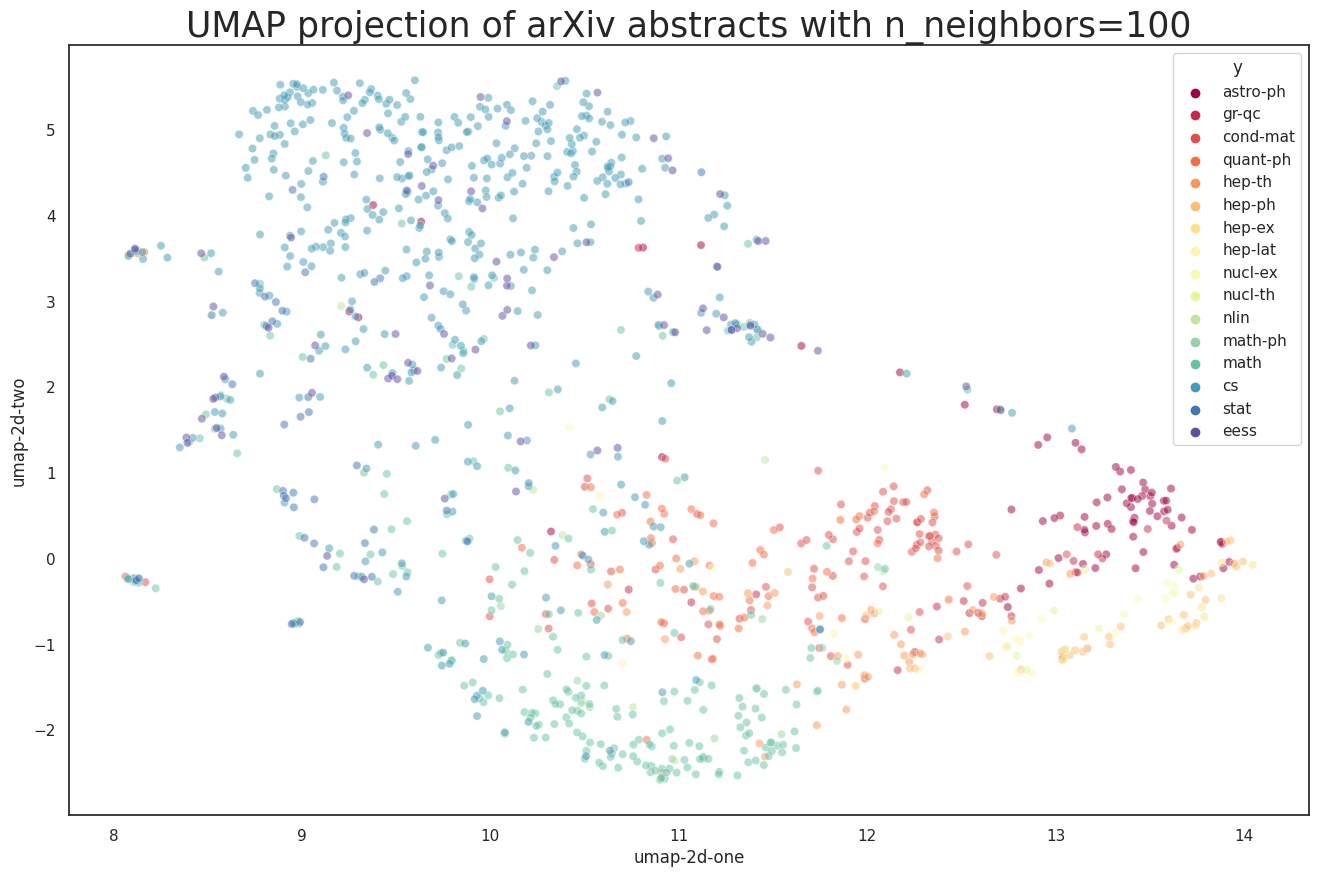

In [53]:
# Let's choose one of the UMAP results to display
nr_index = 5

df_arxiv_umap = pd.DataFrame(np.array([umap_results[nr_index][:,0], umap_results[nr_index][:,1]]).T, columns=["umap-2d-one", "umap-2d-two"])

subjects_list = []
for paper in papers_list:
  subjects_list.append(paper["subject"])
df_arxiv_umap["y"] = subjects_list

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="y",
    palette=color_dict_subjects,
    data=df_arxiv_umap,
    legend="full",
    alpha=0.5
)
plt.title(f"UMAP projection of arXiv abstracts with n_neighbors={n_neighbors[nr_index]}", fontsize=25)

Let's make a more interactive plot using Plotly where we can hover over the points interactively and inspect the results in more detail.

In [54]:
subjects_list = []
for paper in papers_list:
  subjects_list.append(paper["arxiv_topic"])
df_arxiv_umap["y_long"] = subjects_list


fig = px.scatter(df_arxiv_umap,
                 x='umap-2d-one',
                 y='umap-2d-two',
                 color='y',
                 color_discrete_map=color_dict_subjects, # Use your color dictionary
                 hover_data=['y_long']) # This will show the category on hover

fig.update_traces(marker=dict(size=5, opacity=0.5)) # Adjust size and opacity similar to your seaborn plot
fig.update_layout(legend_title_text='arXiv subject') # Customize legend title
fig.show()

Tracing over the points and examining the hover labels we can see a clear clustering of physics topics and computer science topics respectively. The math topics tend to lie between these and we can see that they are closer to those topics which deal with similar lines of research.

> ```We can use the above plot to remove some of the topic subjects if we wish, to reduce the amount of data to embed and make the separation even more visually clear. Also consider changing color scheme.```

### Vector index store & Semantic similarity search

Let's now examine how we can store embeddings in an indexed vector database. There are many different vector stores to choose from which all perform similarly. Here we will make use of [FAISS](https://ai.meta.com/tools/faiss/), which is an open source vector store library developed by Meta.

We will then see how we can use this tool to perform a similarity search over the indexed embeddings and retrieve the most relevant article based on a query using semantic similarity.

We will make use of an open source model from HuggingFace for doing the embeddings here. There are many good options to choose from of varying sizes. As we will see even quite small models perform quite well with semantic search.

> ```The first time you run the below code snippet you will download the embedding model into memory and you will see the progress of this displayed.```

In [55]:
# For embeddings we use a top ranked open source model on the MTEB leaderboard at https://huggingface.co/spaces/mteb/leaderboard
#embedding_model = [
#    "BAAI/bge-large-en-v1.5",
#    "BAAI/bge-small-en-v1.5"
#    ]
embedding_model = embedding_models_HF[1]


# We use the HuggingFaceEmbeddings wrapper to make an embedding object from our model
embedder = HuggingFaceEmbeddings(
      model_name = embedding_model,
      model_kwargs = {'device': 'cpu'},
      encode_kwargs = {'normalize_embeddings': True},
      cache_folder = f"{embedding_model}_cache",
      multi_process = False
      )

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

It is then straightforward to create a FAISS vector index using our Document and HuggingFaceEmbeddings objects. With the small BGE model this will take slightly less than one minute to complete for 50 abstracts. We will therefore pick out a subset of roughly 50 abstracts here for demonstrative purposes.

In [56]:
# We aim to pick out about 50 abstracts from across the documents list, irrespective of how many we originally retrieved
nr_abstracts_in_short_list = 50


# We pick out the baove nr of abstracts evenly spaced out over our list of retrieved abstracts
documents_short = documents[::max(1, len(documents) // nr_abstracts_in_short_list)]
#documents_short = documents[-nr_abstracts_in_short_list:]

print(f" The short list of documents contain {len(documents_short)} abstracts")

 The short list of documents contain 52 abstracts


In [57]:
# We embed and store embeddings for the shortened list of abstracts
faiss_index = FAISS.from_documents(
      documents=documents_short,
      embedding=embedder
      )

Let's pick out an article and display its abstract. This will allow us to make a query which we know matches this particular abstract.

In [58]:
# choose a number between 0-20 to pick out one of the indexed abstracts
abstract_nr = 25

documents_short[abstract_nr]

Document(page_content='We study the scheduling problem in a status update system composed of an\narbitrary number of information sources with different service time\ndistributions and weights for the purpose of minimizing the weighted sum age of\ninformation (AoI). In particular, we study open-loop schedulers which rely only\non the statistics (specifically, only on the first two moments) of the source\nservice times, in contrast to closed-loop schedulers that also make use of the\nactual realizations of the service times and the AoI processes in making\nscheduling decisions. Open-loop scheduling policies can be constructed off-line\nand are simpler to implement compared to their closed-loop counterparts. We\nconsider the generate-at-will (GAW) model, and develop an analytical method to\ncalculate the exact AoI for the probabilistic and cyclic open-loop schedulers.\nIn both cases, the server initiates the sampling of a source and the ensuing\ntransmission of the update packet from the 

Now we can construct a search query which is related to the above abstract. We then use this query to retrieve a nr of close matches from the indexed vector stored. These are retrieved as a list in sorted order, with the closest match appearing first.

Let's do this by having the LLM make a query for us from the above abstract.

In [59]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are an expert in summarizing scientific literature.
"""

# We can try to set this quite low to make it hard for the retriever,
# noting that if several abstracts are on a similar topic then a very short summary
# should make it more difficult to retrieve the intended one
max_words_for_summary = 3

user_prompt = f"""
Consider carefully the abstract supplied below and construct a very brief summary of its content.
Try to use a maximum of {max_words_for_summary} words and do not include any mathematical formulas in your summary.

abstract: {documents_short[abstract_nr].page_content}
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [60]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.0
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Scheduling AoI minimization.


Now we can use this short summary to try to find the correct article amongst all the ones we have embedded.

In [61]:
# We define a generic query which incorporates the summary from the LLM
search_query = f"Find an article which discusses: {response.content}"


# Define how many similar documents you want to retrieve
# These are returned in sorted order, with most similar placed first
nr_hits = 5


# Use FAISS to perform similarity search ...
most_similar = faiss_index.similarity_search(query = search_query, k=nr_hits)


# Lets check that the closest retrieved match is the same as abstract we used to construct the query
if documents_short[abstract_nr].metadata["title"] == most_similar[0].metadata["title"]:
  print(Style.BRIGHT + "SUCESS! We found the correct abstract as the top ranked choice!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar[0])
# In case it was not the top pick, we check if it was among the ones retrieved from the vector store
elif documents_short[abstract_nr].metadata["title"] in [most_similar[nr_hit].metadata["title"] for nr_hit in range(1,nr_hits)]:
  print(Style.BRIGHT + f"PARTIAL SUCESS! We found the correct abstract among the top {nr_hits} ranked choices!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar[0])
else:
  print(Style.BRIGHT + "FAILURE! We didn't retrieve the correct abstract as top choice!" + Style.RESET_ALL)

SUCESS! We found the correct abstract as the top ranked choice!
--------------------------------------------------
page_content='We study the scheduling problem in a status update system composed of an\narbitrary number of information sources with different service time\ndistributions and weights for the purpose of minimizing the weighted sum age of\ninformation (AoI). In particular, we study open-loop schedulers which rely only\non the statistics (specifically, only on the first two moments) of the source\nservice times, in contrast to closed-loop schedulers that also make use of the\nactual realizations of the service times and the AoI processes in making\nscheduling decisions. Open-loop scheduling policies can be constructed off-line\nand are simpler to implement compared to their closed-loop counterparts. We\nconsider the generate-at-will (GAW) model, and develop an analytical method to\ncalculate the exact AoI for the probabilistic and cyclic open-loop schedulers.\nIn both cases, 

We can inspect all the top ranked abstracts we retrieved and see how well they matched the summarization we used when searching.

In [62]:
cnt=1
for doc in most_similar:
  print(Style.BRIGHT + f"Hit nr {cnt}, Title: {doc.metadata['title']}" + Style.RESET_ALL)
  print(doc.page_content)
  print("--"*25)
  cnt+=1

Hit nr 1, Title: Minimizing Weighted Sum Age of Information with Open-Loop Cyclic  Scheduling
We study the scheduling problem in a status update system composed of an
arbitrary number of information sources with different service time
distributions and weights for the purpose of minimizing the weighted sum age of
information (AoI). In particular, we study open-loop schedulers which rely only
on the statistics (specifically, only on the first two moments) of the source
service times, in contrast to closed-loop schedulers that also make use of the
actual realizations of the service times and the AoI processes in making
scheduling decisions. Open-loop scheduling policies can be constructed off-line
and are simpler to implement compared to their closed-loop counterparts. We
consider the generate-at-will (GAW) model, and develop an analytical method to
calculate the exact AoI for the probabilistic and cyclic open-loop schedulers.
In both cases, the server initiates the sampling of a source 

If you try to play around with the above you will find that it is quite hard to get the retriever to fail based on a semantic similarity search even for a very condense summary of the abstracts.

#### Breaking the retriever?


In order to make things a bit harder we will try to collect a series of abstracts which are all related to the same topic, but which are not necessarily recent. To this end we fetch 100 article abstracts based on the query keyword `LLM`.

In [63]:
query_keyword = "LLM"
url = f"https://arxiv.org/search/?query={query_keyword}&searchtype=all&abstracts=show&order=-announced_date_first&size=100"


# We collect everything in a list of dictionaries
response = requests.get(url)
if response.status_code != 200:
  print('Failed to retrieve data from', url)

soup = BeautifulSoup(response.content, 'html.parser')


papers = []
for item in soup.find_all('li', class_='arxiv-result'):
  title = item.find('p', class_='title is-5 mathjax').text.strip()
  abstract = item.find('span', class_='abstract-full has-text-grey-dark mathjax').text.strip()
  papers.append({"title": title, "abstract": abstract})

print("")
print(f"We extracted a total of {len(papers)} abstracts on the topic of {query_keyword}")


We extracted a total of 100 abstracts on the topic of LLM


In [64]:
documents_topic =  []

for paper in papers:
  doc  = Document(
      page_content = paper["abstract"],
      metadata = {"title": paper["title"]}
  )
  documents_topic.append(doc)

We embed these documents just as before

In [65]:
# We embed and store embeddings for the shortened list of abstracts
faiss_index_topic = FAISS.from_documents(
      documents=documents_topic,
      embedding=embedder
      )

And then we pick out one of the abstracts to make a query we can try to use for search retrieval.

In [66]:
# choose a number between 0-99 to pick out one of the indexed abstracts
abstract_nr = 10

documents_topic[abstract_nr]

Document(page_content="Recent innovations in generative large language models (LLMs) have made their applications and use-cases ubiquitous. This has led to large-scale deployments of these models, using complex, expensive, and power-hungry AI accelerators, most commonly GPUs. These developments make LLM inference efficiency an important challenge. Based on our extensive characterization, we find that there are two main phases during an LLM inference request: a compute-intensive prompt computation, and a memory-intensive token generation, each with distinct latency, throughput, memory, and power characteristics. Despite state-of-the-art batching and scheduling, the token generation phase underutilizes compute resources. Specifically, unlike compute-intensive prompt computation phases, token generation phases do not require the compute capability of the latest GPUs, and can be run with lower power and cost.\n  With Splitwise, we propose splitting the two phases of a LLM inference request

In [67]:
# The system prompt will be placed at the top of every message and should set overall system behaviour
system_prompt = """
You are an expert in summarizing scientific literature.
"""

# We can try to set this quite low to make it hard for the retriever,
# noting that if several abstracts are on a similar topic then a very short summary
# should make it more difficult to retrieve the intended one
max_words_for_summary = 3

user_prompt = f"""
Consider carefully the abstract supplied below and construct a very brief summary of its content.
Try to use a maximum of {max_words_for_summary} words and do not include any mathematical formulas in your summary.

abstract: {documents_topic[abstract_nr].page_content}
"""


# These are collected into a messages list of
#
#   SystemMessage - the system prompt
#   HumanMessage  - the user query
#   AIMessage     - the bot response, in case you wish to continue on a conversation
messages = [
    SystemMessage(content=system_prompt),
    HumanMessage(content=user_prompt),
]

In [68]:
# This creates an instance of the model interface which we can subsequently call on
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    # The below parameters can be changed
    model="gpt-3.5-turbo-1106",
    temperature=0.0
)


# Here we collect the output from the chat model in the variable response
response = chat_model.invoke(messages)

# We can print out the response by calling on its content using a .content
print(response.content)

Summary: 
Language model optimization


Now let's see if we can find the needle in this proverbial haystack as easily as before.

In [69]:
# We define a generic query which incorporates the summary from the LLM
search_query = f"Find an article which discusses: {response.content}"


# Define how many similar documents you want to retrieve
# These are returned in sorted order, with most similar placed first
nr_hits = 5


# Use FAISS to perform similarity search ...
most_similar_topic = faiss_index_topic.similarity_search(query = search_query, k=nr_hits)


# Lets check that the closest retrieved match is the same as abstract we used to construct the query
if documents_topic[abstract_nr].metadata["title"] == most_similar_topic[0].metadata["title"]:
  print(Style.BRIGHT + "SUCESS! We found the correct abstract as the top ranked choice!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar_topic[0])
# In case it was not the top pick, we check if it was among the ones retrieved from the vector store
elif documents_topic[abstract_nr].metadata["title"] in [most_similar_topic[nr_hit].metadata["title"] for nr_hit in range(1,nr_hits)]:
  print(Style.BRIGHT + f"PARTIAL SUCESS! We found the correct abstract among the top {nr_hits} ranked choices!" + Style.RESET_ALL)
  print("--"*25)
  print(most_similar_topic[0])
else:
  print(Style.BRIGHT + "FAILURE! We didn't retrieve the correct abstract as top choice!" + Style.RESET_ALL)

FAILURE! We didn't retrieve the correct abstract as top choice!


# Hands-On 3: Working against a PDF knowledge base

Some text here to introduce the main purpose of this section ... RAG from PDF ... basic finetuning of embedding model

We start by providing the location and names of the PDF files which we will be exploring.

In [ ]:
# Absolute or relative path to folder where the PDF files are located
DATAPATH = "/content/"
#DATAPATH = "/content/drive/MyDrive/bootcamp_dec7/Data/"



# Name of the PDF files (without the trailing .pdf file endings)
Patricia_permobil_manual = "Patricia_permobil_manual"
caterpillar_10k = "Caterpillar-10k"
whirlpool_10k = "whirlpool-10k"
electrolux_ann_rep = "Electrolux-annual-report"


# We collect all the PDF file names in a list
pdf_files = [
    Patricia_permobil_manual,
    caterpillar_10k,
    whirlpool_10k,
    electrolux_ann_rep
]

> **We load and inspect the text converted PDF files and some properties below**

We can now load one of the PDFs and examine its content. Note that this relies on extracting the content of the PDF as text and works well for the parts which are written text in the PDF, but works less well for e.g., tables and figures. In order to handle tables and figures well we typically need to perform pre-processing steps which are more complex and tailored for the specific PDF file type we wish to examine.

In [ ]:
# Helper functions for text retrieval from documents
#-------------------------------------------------------------------------------
def text_from_pdf(file_path: str) -> dict:
  """
  Uses the PyMuPDF library fitz module to extract raw text from a pdf.
    https://pymupdf.readthedocs.io/en/latest/

  Input:
  file_path - path to pdf file for parsing

  Output:
  dict - Returns a dictionary with "page_nr" as key and extracted text as value.
  Additional properties can be made available (see link in comment below).
  """
  doc = fitz.open(file_path)
  pages = {}
  for page in doc:
    # type(page) = <class 'fitz.fitz.Page'>
    # (https://pymupdf.readthedocs.io/en/latest/page.html)
    pages[f"page_{page.number}"] = page.get_text()
  return pages

def pdf_dict_to_str(pdf_dicct: dict) -> str:
  """Construct a single text string from text_from_pdf() output"""
  return "\n".join(pdf_dicct.values())

In [ ]:
pdf_file = Patricia_permobil_manual

# Here we read in the PDF as text using the function text_from_pdf(), defined in the file helper_functions.py
pdf_text = text_from_pdf(DATAPATH + pdf_file + ".pdf")


# Here we count and print out the total nr of pages in the retrieved PDF
print(f"{Fore.RED + Back.LIGHTYELLOW_EX + Style.BRIGHT}Nr of pages in pdf document:{Style.RESET_ALL} {len(pdf_text.keys())} \n")


# Here we count and print out the total nr of symbols in the retrieved PDF file
concat_text = pdf_dict_to_str(text_from_pdf(DATAPATH + pdf_file + ".pdf"))
print(f"The document contains {Fore.RED + Back.LIGHTYELLOW_EX + Style.BRIGHT}{len(concat_text)}{Style.RESET_ALL} symbols/characters")


# We then print an example page from the PDF
print(f"{Fore.RED + Back.LIGHTYELLOW_EX + Style.BRIGHT}\n\nEx text from first page:{Style.RESET_ALL}\n")
print(f"{pdf_text['page_3']}")

Nr of pages in pdf document: 96 

The document contains 195303 symbols/characters


Ex text from first page:

ZR Owner’s Manual
OM0005_Rev A_ZR
ii
REGISTER YOUR TiLITE
Register online at TiLite.com
or
Complete and mail the form on the next page
Why Should You Register:
1. Increase your use and enjoyment of your TiLite by receiving updates from
    TiLite with product information, maintenance tips and industry news.
2. Enable TiLite to contact you or your health care provider if servicing is
    needed for your wheelchair.
3. Provide your feedback to TiLite regarding your experience and needs,
    thereby enabling TiLite to further improve product designs.
All information you provide to TiLite when you register will be protected by TiLite as 
required by applicable laws and regulations and will be used solely by TiLite.



### OPTIONAL: The following section performs chunking of text and creates indexed embeddings for the chunks

The chat models have a limit in the number of tokens/characters they can receive as input. This means we cannot feed them the full PDF as context. Rather we need to find the most relevant pieces of text within the PDF and use that when asking the LLM to respond to a query about the PDF.

Here we split up the four PDF documents into piecewise chunks of text for embedding purposes.

In [ ]:
def TextLoader(
    file_path: str,
    loader: Type[PyPDFLoader | JSONLoader | None]=None,
    jq_schema: str='.', # '.content', '.messages[].content'
    content_key='content',
    json_lines: bool=False,
    txt_encoding: str=sys.getfilesystemencoding()
    ) -> List[Document]:
    """
    Converts a pdf, JSON or txt file into a langchain Document object,
    containing methods page_content and metadata.
    Specify type via loader, if not PyPDFLoader | JSONLoader then assumes txt
    """
    pages = None
    if loader==PyPDFLoader:
      loader = PyPDFLoader(file_path=file_path)
      pages = loader.load()   # .load_and_split()
    elif loader==JSONLoader:
      loader = JSONLoader(
          file_path=file_path,
          jq_schema=jq_schema,
          content_key=content_key,
          json_lines=json_lines
          )
      pages = loader.load()
    else:
      text_string = text_from_txt(file_path=file_path, encoding=txt_encoding)
      pages = [Document(page_content=text_string, metadata={"source": file_path})]
    return pages


def chunk_documents(
    documents: List[Document],
    TextSplitter: Type[CharacterTextSplitter | RecursiveCharacterTextSplitter],
    chunk_size: int=512,
    chunk_overlap: int=20,
    separator: str=None,
    ) -> List[Document]:
    """
    TBW ...
    Output: A list of langchain.schema.document.Document objects.
    These have methods
      - Document.page_content [str] contains the text chunk
      - Doumnent.metadata [dict] contains optional metadata
    """
    docs = None
    # CharacterTextSplitter
    if separator!=None:
      text_splitter = CharacterTextSplitter(
      separator = separator,
      chunk_size = chunk_size,
      chunk_overlap  = chunk_overlap
      )
      docs = text_splitter.split_documents(documents)
    #RecursiveCharacterTextSplitter
    else:
      text_splitter = RecursiveCharacterTextSplitter(
          chunk_size = chunk_size,
          chunk_overlap  = chunk_overlap
      )
      docs = text_splitter.split_documents(documents)

    if docs:
      return docs
    else:
      print(f"Error: could not chunk text.")
      return None


def text_from_txt(
    file_path: str,
    encoding: str=sys.getfilesystemencoding()
    ) -> str:
  """
  Reads a txt file and returns a string object of content

  Input:
  file_path - path to txt file for parsing

  Output:
  str - Returns extracted text as str.
  """
  with open(file_path, encoding=encoding) as f:
    text = f.read()
  return text

In [ ]:
# We loop over the 4 PDF files and  collect the chunked results into a Python dictionary
chunked_pdf_files_dict = {}
for pdf_file in pdf_files:
    # Here we get the path to the current PDF file
    pdf_location = DATAPATH + pdf_file + ".pdf"
    # The below function performs the cunking of the PDF
    chunked_pdf = chunk_documents(
        documents= TextLoader(file_path=pdf_location, loader=PyPDFLoader),
        TextSplitter=RecursiveCharacterTextSplitter,
        chunk_size=512, # 512 is the maximum Sequence length
        chunk_overlap=20,
        separator=None,
        )
    chunked_pdf_files_dict[pdf_file] = chunked_pdf

Let's print out a sample chunk so that we can see what kind of information is available within a single chunk of text.

In [ ]:
print(chunked_pdf_files_dict[Patricia_permobil_manual][79].page_content)

3. The assistant at the rear of the chair is in control of this procedure. He or she must tilt the chair back to its balance point on the rear wheels. NEVER attempt to lift a wheelchair by lifting on any removable (detachable) parts, including upholstery and removable push handles or push handle grips. 
4. The second assistant at the front must firmly grasp a non-detachable part of the front frame (but NOT swing away hangers) with both hands and lift the chair up and over one stair at a time.


We can also inspect a chunk which contains a table, to see what it looks like. Observe the format of the table and note that this is the kind of inromation that will be provided as input to the LLM when we query it.

In [ ]:
# The below chunk contains a table from the caterpillar_10k PDF.
print(chunked_pdf_files_dict[caterpillar_10k][104].page_content)

agreement.  At select business units, we have hired certain highly specialized employees under employment contracts that specify a
term of employment, pay and other benefits.
 
Full-T ime Employees at Year-End
 2022 2021
Inside U.S. 48,200 44,300
Outside U.S. 60,900 63,400
Total 109,100 107,700
By Region:   
North America 48,700 44,700
EAME 16,900 17,600
Latin America 19,100 19,500
Asia/Pacific 24,400 25,900
Total 109,100 107,700


#### Performing the embedding of the chunked PDF documents

In [ ]:
embed_pdfs = False
save_embeddings = False

# For embeddings we use the best open source model on the MTEB leaderboard at https://huggingface.co/spaces/mteb/leaderboard
embedding_model = "BAAI/bge-small-en-v1.5"

> **NB: The below code block takes around 100 minutes to complete for the four PDF's (100-150 pages each), so this has been prepared before the lecture. We have kept the code here for those interested, but during the course**
>
> **`DO NOT RUN THE BELOW TWO CELLS!` or `DO NOT MODIFY THE embed_pdfs = False and save_embeddings = False!`**

In [ ]:
def make_index_FAISS(
    chunked_documents: List[Document],
    embedding: HuggingFaceEmbeddings,
    ) -> List:
  """Use FAISS to perform similarity search ..."""
  faiss_index = FAISS.from_documents(
      documents=chunked_documents,
      embedding=embedding
      )
  return faiss_index


def similarity_search_FAISS(
    search_query: str,
    index_store: FAISS,
    nr_hits: int=5,
    ) -> List:
  """Use FAISS to perform similarity search ..."""
  most_similar = index_store.similarity_search(search_query, k=nr_hits)
  return most_similar

In [ ]:
if embed_pdfs:
    embedding_dict = {}
    for pdf_file in pdf_files:
        print(f"Creating FAISS embedding for document {pdf_file} using - {embedding_model}")
        start = timer()
        embedding = doc_embedding(embedding_model=embedding_model)
        faiss_index = make_index_FAISS(chunked_documents=chunked_pdf_files_dict[pdf_file], embedding=embedding)
        end = timer()
        time_taken=end-start
        print(f"Done! Embedded vector index created after {time_taken/60:.2f} minutes")
        print("*"*25)
        embedding_dict[pdf_file] = faiss_index

Here we save the embeddings so that we don't have to rerun the above every time.

In [ ]:
if save_embeddings:
    for pdf_embedding in embedding_dict.keys():
        FAISS_folder_name = DATAPATH + f"FAISS_{pdf_embedding}.faiss"
        embedding_dict[pdf_embedding].save_local(FAISS_folder_name)

Note that the above two code blocks have been run in advance in order to save the embeddings. This allows us to avoid doing this during the live session.

### Loading the saved embeddings

In order to match our query to relevant context within the PDF files we must embed the text of the PDF files into an *embedding space*. This is done by chunking the text of the PDF files and then store the chunks as indexed *embedding vectors*. This is what has been done in advance by performing the steps in the above optional section.

We can then create an *embedding vector* from our query and perform a similarity operation against all of the embedded chunks, which allow us to find the most semantically similar chunks by performing a very quick operation. In this way we can quickly retrieve relevant context for our query.

If embeddings are already saved we can simply load them from storage. The output from running the embedding models have been saved in the four FAISS folders which you can see in the downloaded course content. This avoids repeating the embedding process which can be quite time consuming. In a production environment you typically do this kind of indexing once, or on a running schedule if you expect the documents you embed will change over time.

> **`Note that the first time you run the below code cell block you will load the embedding model into memory and you may see progress bars running while this happens. Once the model is loaded into memory this will no longer happen.`**

In [ ]:
# For embeddings we use the best open source model on the MTEB leaderboard at https://huggingface.co/spaces/mteb/leaderboard
embedding_model = "BAAI/bge-large-en-v1.5"

# We load and collect the saved embeddings in a python dictionary. This only takes ~15 seconds to load
faiss_embeddings_dict = {}
if not save_embeddings:
    for pdf_file in pdf_files:
        FAISS_folder_name = DATAPATH + f"FAISS_{pdf_file}.faiss"
        embedding = doc_embedding(embedding_model=embedding_model)
        faiss_embeddings_dict[pdf_file] = FAISS.load_local(FAISS_folder_name, embedding)

Let's try out making a simple query against the saved embeddings by doing a similarity search. The similarity search is a quick operation which retrieves the most semantically similar embeddings to your query.

In [ ]:
# We choose one of the PDF files and a relevant search query
pdf_file = Patricia_permobil_manual
similarity_query = "What is the procedure for setting up my TiLite rigid wheelchair?"


# We retrieve the most semantically similar chunks by doing a similarity search over the saved embeddings in our faiss_embeddings_dict
# The argument k sets how many such chunks we wish to retrieve
test = faiss_embeddings_dict[pdf_file].similarity_search(similarity_query, k=10)


# We can now print out the most similar chunk. We print out both the chunk and the PDF page on which it is located.
# The retrieved chunks are collected in order of similarity from 0 to k-1,
# so chunk_nr = 0 correspond to the most similar chunk
chunk_nr = 0
print(f"Found on page: {test[chunk_nr].metadata['page']}\n")
print(test[chunk_nr].page_content)

### Querying the Permobil Manual PDF

We are now ready to start asking questions of our PDF files.

In [ ]:
# Step 1:
# Setting up the Model
# We're preparing to use a specific AI model by setting some initial parameters.
# One of these parameters is 'temperature', which affects how creative or strict the model's responses will be.
# A lower temperature like 0.0 makes the model more focused and less random in its responses.
temperature = 0.0


# Now we create an instance of the ChatOpenAI model, which we'll use to generate responses.
# We're specifying which model to use ('gpt-3.5-turbo') and providing our OpenAI API key to authorize access.
chat_model = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    model="gpt-3.5-turbo",
    temperature=temperature
)


# Step 2:
# Defining a Prompt Function to Use the Model
# We define a function for more easily calling the LLM using the same prompt template but with a different query and context
def LLM_with_pdf_context(context: str, query: str, temperature: float=0.0):

    # System prompt
    system_prompt = f"""
    Ignore all previous instructions. You are a helpful investment management expert.
    You are logical, methodical and always find the best and most relevant answer to a query.
    Break down the problem, objects, numbers and logic before starting to answer the query.
    Then proceed to answer in a step-by-step manner.
    """

    # This prompt template inputs the merged context and query for the LLM
    user_prompt = f"""
    I need help from an investement management expert.
    One of our portfolio companies have handed us these brief instruction snippets as
    context: {context}

    Use only the above context and nothing else to answer the following
    question: {query}
    If the answer is provided in the form of a bulleted list within the context,
    then return those instructions verbatim and do not try to rephrase them.
    If you cannot answer based on the information in context, then do not try to answer, but instead must answer verbatim with:
    {{There is no available information related to your query in the context!'}}
    """

    messages = [
        SystemMessage(content=system_prompt),
        HumanMessage(content=user_prompt),
    ]

    response = chat_model(messages, temperature=temperature)
    print(response.content)

In [ ]:
# We choose one of the PDF files and a relevant search query. This query is the same as we asked during session 1 using the AskYourPDF plugin
pdf_file = Patricia_permobil_manual
query = "What tools are needed for adjusting the Front Seat Height on Slipstream Single-Sided Forks. Also provide the steps for performing the adjustment."


# We retrieve the most similar chunks related to above search query and collect these into a context string
faiss_index = faiss_embeddings_dict[pdf_file]
top_hits = similarity_search_FAISS(search_query=query, nr_hits=5, index_store=faiss_index)
context = "".join([document.page_content for document in top_hits])

First, let's use all of the retrieved top hits as context when querying the model.

In [ ]:
# Use our pre-defined function to get the model response
LLM_with_pdf_context(context, query)

We see that the instructions are incomplete (these contain 7 steps in the PDF). This is due to the fact that the most relevant chunk happened to only contain the first part of the full instructions. Since the chunks are small this is something that can happen quite often. In order to get a more complete response we can try to feed not the retrieved and merged chunks as context, but instead feed the whole PDF page of the most relevant chunk, assuming it contains more fuller context. We can also do some combination of this and using other chunks if we find that top hit doesn't always work.

In [ ]:
# Here we get the page of the top hit and use that whole PDF page as context
context_page = f"""{pdf_text[f'page_{top_hits[0].metadata["page"]}']}"""

# Use the pre-defined function but with the whole context page as context
LLM_with_pdf_context(context_page, query)

In this case this worked much better, since the retrieved page actually contained the full instructions. In real production applications you may not always be so lucky, the instructions could for example be spread over multiple pages, so some work is often required to ensure consistency over a large corpus of texts.

### Querying the Electrolux Annual Report PDF

Let's try asking some questions based on the content in the Electrolux's annual report for 2022.

In [ ]:
def get_contexts(pdf: str, query: str, faiss_embeddings_dict: dict, nr_hits: int=5):
    contexts = []
    faiss_index = faiss_embeddings_dict[pdf]
    top_hits = similarity_search_FAISS(search_query=query, nr_hits=nr_hits, index_store=faiss_index)
    context = "".join([document.page_content for document in top_hits])
    contexts.append(context)

    return contexts

In [ ]:
# Set our pdf variable to the Electrolux annual report
pdf_file = electrolux_ann_rep

In [ ]:
query = "Which major events happened for Electrolux during 2022?"


# Use our function to retrieve the most similar chunks related to the search query for the given PDF
context = get_contexts(pdf=pdf_file, query=query, faiss_embeddings_dict=faiss_embeddings_dict)


# Use our pre-defined function to get the model response
LLM_with_pdf_context(context, query)

**Try it out yourself:**

Try it out by searching with your own query for information from the Electrolux Annual Report. You could, for example, ask questions about risks and challenges mentioned in the report or ask the model to explain Electrolux's business in Latin America.

In [ ]:
# Write your own query and retrieve search results from that as context for the LLM
query = "..."


# Use our function to retrieve the most similar chunks related to the search query for the given PDF
context = get_contexts(pdf=pdf_file, query=query, faiss_embeddings_dict=faiss_embeddings_dict)


# Use our pre-defined function to get the model response
LLM_with_pdf_context(context, query)

### Querying the Caterpillar 10-K PDF

Let's try asking some questions based on the content in the Caterpillar 10-K annual report for 2022.

In [ ]:
# Set our pdf variable to the Caterpillar 10-K report
pdf_file = caterpillar_10k

In [ ]:
# Ask a relevant query
query = "Which identified risks and challenges are mentioned in the report?"


# Use our function to retrieve the most similar chunks related to the search query for the given PDF
context = get_contexts(pdf=pdf_file, query=query, faiss_embeddings_dict=faiss_embeddings_dict)


# Use our pre-defined function to get the model response
LLM_with_pdf_context(context, query)

**Tables in PDF-reports:**

The Caterpillar 10-K report contains multiple tables which may cause a problem when using the text chunks for similarity retrieval. Here we can try and ask questions about information found in tables in the report. However, depending on the chunks, the model may confuse numbers found in the tables.

In [ ]:
# Let's ask a question which requires analyzing table information inside the PDF
query = "How many full-time employees did they have at the end of the year 2022 in Latin America?"


# Use our function to retrieve the most similar chunks related to the search query for the given PDF
context = get_contexts(pdf=pdf_file, query=query, faiss_embeddings_dict=faiss_embeddings_dict)


# Use our pre-defined function to get the model response
LLM_with_pdf_context(context, query)

**Try it out yourself:**

Try it out by searching with your own query for information from the Caterpillar 10-K report.

In [ ]:
# Write your own query and retrieve search results from that as context for the LLM
query = "..."


# Use our function to retrieve the most similar chunks related to the search query for the given PDF
context = get_contexts(pdf=pdf_file, query=query, faiss_embeddings_dict=faiss_embeddings_dict)


# Use our pre-defined function to get the model response
LLM_with_pdf_context(context, query)

### Comparison between two PDF: Electrolux Annual Report and Whirlpool 10-K Report

Let's go a bit deeper and try to compare information between two different PDF files. We can try to ask a question for which we expect there are answers in both the Electrolux annual report and the Whirlpool 10-K report. By using a query to retrieve relevant information from both of these reports we can use that as context to the LLM and ask about comparisons etc.

In [ ]:
# We define a function for more easily call the LLM using the same prompt template but with a different query and contexts
def LLM_with_pdf_context_comparison(company1: str, company2: str, context1: str, context2: str, query: str, temperature: float=0.0):

    # System prompt
    system_prompt = f"""
    Ignore all previous instructions. You are a helpful investment management expert.
    You are logical, methodical and always find the best and most relevant answer to a query.
    Break down the problem, objects, numbers and logic before starting to answer the query.
    Then proceed to answer in a step-by-step manner.
    """

    # This prompt inouts the merged context
    user_prompt = f"""
    Two of our portfolio companies have handed us these brief instruction snippets as
    contexts. Contexts for {company1}: {context1}, and for {company2}: {context2}

    Use only the above contexts and nothing else to answer the following
    query: {query}
    If the answer is provided in the form of a bulleted list within the context,
    then return those instructions verbatim and do not try to rephrase them.
    If you cannot answer based on the information in context, then do not try to answer, but instead must answer verbatim with:
    {{There is no available information related to your query in the context!'}}
    """

    messages = [
        SystemMessage(content=system_prompt),
        HumanMessage(content=user_prompt),
    ]

    response = chat_model(messages, temperature=temperature)
    print(response.content)

With the help of the above function we can pose queries which prompts the LLM to compare the information in different PDF's by creating separate contexts. Here, we compare the information in the Electrolux Annual report and Whirlpool 10-K report.

In [ ]:
# Let's make a query which we would like to pose to both the Whirlpool and the Electrolux PDF files
query = "Which key business strategies were mentioned in the report?"


# Using the above query, we can fetch relevant contexts from both PDF files
context_whirlpool = get_contexts(pdf=whirlpool_10k, query=query, faiss_embeddings_dict=faiss_embeddings_dict)
context_electrolux = get_contexts(pdf=electrolux_ann_rep, query=query, faiss_embeddings_dict=faiss_embeddings_dict)

In [ ]:
# Given the above retrieved contexts we can now ask a comparative question between the companies
chat_query = "These are the key business strategies for Whirlpool and Electrolux. Compare them. Which strategies are similar and which are different?"

In [ ]:
# Use our pre-defined function together with the names of the companies and their context
LLM_with_pdf_context_comparison("Whirlpool", "Electrolux", context_whirlpool, context_electrolux, chat_query)

**Try it out yourself:**

Try it out by telling your model what information from the reports you want to compare, for example, their sustainability strategies.

In [ ]:
# Write your own query on what you like to pose to both the Whirlpool and the Electrolux PDF files
query = "..."


# Using the above query, we can fetch relevant contexts from both PDF files
context_whirlpool = get_contexts(pdf=whirlpool_10k, query=query, faiss_embeddings_dict=faiss_embeddings_dict)
context_electrolux = get_contexts(pdf=electrolux_ann_rep, query=query, faiss_embeddings_dict=faiss_embeddings_dict)


# Change this query to ask the model to compare ... for the companies.
chat_query = "This is the ... for Whirlpool and Electrolux. Compare them."


# Use our pre-defined function together with the names of the companies and their context
LLM_with_pdf_context_comparison("Whirlpool", "Electrolux", context_whirlpool, context_electrolux, chat_query)

### End of the notebook